In [136]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB




DATA UNDERSTANDING

In [ ]:
file_path = "C:\\Users\\HP\\Desktop\\terry dtops data\\Terry_Stops_20240301.csv"
df = pd.read_csv(file_path)

df

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Check for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


In [ ]:
df.head()


In [ ]:
print(df.columns)

In [ ]:
# i'm Summarizing numerical columns and round to 3 decimal places
numerical_summary = df.describe().round(3)

print(numerical_summary)



In [ ]:
# Iterate over columns to identify categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")


### DATA EXPLORATION
getting the relevant data for exploration

In [ ]:

relevant_columns = ['Officer Race', 'Subject Perceived Race', 'Stop Resolution', 'Frisk Flag', 'Arrest Flag','Precinct', 'Beat', 'Initial Call Type', 'Final Call Type']

# storing them into a new dataset
data2 = df[relevant_columns]

print(data2.head())

In [ ]:
data2.head()

In [ ]:
data2.dtypes

race composition grapgh

In [ ]:
race_counts = data2['Officer Race'].value_counts()

# Plotting the race composition
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Composition of Officers')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


In [ ]:
# Plotting the distribution of subject perceived race with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Perceived Race', data=data2, palette='viridis')
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


In [ ]:
data2

relation ship between officer and subject race

In [ ]:

# i'm Creating a pivot table to count occurrences of each combination of races
pivot_table = data2.pivot_table(index='Officer Race', columns='Subject Perceived Race', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Officer Race and Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Officer Race')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0, va='center')  
plt.tight_layout()  
plt.show()



In [ ]:
print(data2.dtypes)


In [ ]:
# Check for NaN values in data2
nan_values = data2.isna().sum()

print("NaN values in each column:")
print(nan_values)

In [ ]:
# Drop rows with NaN values in 'Frisk Flag' column
data2_cleaned = data2.dropna(subset=['Frisk Flag'])

# Check if NaN values are removed
print("NaN values in each column after deletion:")
print(data2_cleaned.isnull().sum())


## Hypothesis Testing: Relationship Between Officer's Race and Stop Resolution

### Hypotheses:
- **Null Hypothesis (H0):** There is no association between the officer's race and the stop resolution.
- **Alternative Hypothesis (H1):** There is an association between the officer's race and the stop resolution.

### Finding:
Based on the small p-value obtained from the chi-square test (much smaller than the significance level of 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that there is indeed a significant association between the officer's race and the stop resolution.
This analysis suggests that the type of stop resolution is not independent of the officer's race, indicating potential biases or underlying factors influencing the stop resolution based on the officer's race.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming data2 is properly defined DataFrame

# Creating a contingency table
contingency_table = pd.crosstab(data2_cleaned['Officer Race'], data2_cleaned['Stop Resolution'])

print("Contingency Table:")
print(contingency_table)

# Calculating chi-square statistic and p-value
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)


 the relationship between the officer's race and stop resolution

In [ ]:
import matplotlib.pyplot as plt

# Plotting the stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stop Resolution by Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Frequency')
plt.legend(title='Stop Resolution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


arrest rates by race

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Officer Race', hue='Arrest Flag')


plt.title('Arrest Rates by Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Arrest Rate')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Computing the proportions or percentages to compare the likelihood of frisks or arrests across different racial groups.

In [ ]:
# Handle NaN values
data2['Frisk Flag'] = data2_cleaned['Frisk Flag'].map({'Y': 1, 'N': 0})
data2['Arrest Flag'] = data2_cleaned['Arrest Flag'].map({'Y': 1, 'N': 0})

# Compute proportions
frisk_proportions = data2_cleaned.groupby(['Officer Race', 'Subject Perceived Race'])['Frisk Flag'].mean()
arrest_proportions = data2_cleaned.groupby(['Officer Race', 'Subject Perceived Race'])['Arrest Flag'].mean()

# Display proportions
print("Frisk Proportions:")
print(frisk_proportions)
print("\nArrest Proportions:")
print(arrest_proportions)


frisk and arrest visualizations 

In [ ]:
import matplotlib.pyplot as plt

# Plotting frisk proportions
plt.figure(figsize=(14, 8))  # Enlarge the figure size
frisk_proportions.unstack().plot(kind='bar', stacked=True)
plt.title('Proportions of Frisks by Officer Race and Subject Perceived Race')
plt.xlabel('Officer Race')
plt.ylabel('Proportion of Frisks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subject Perceived Race')
plt.tight_layout()
plt.show()

# Plotting arrest proportions
plt.figure(figsize=(14, 8))  # Enlarge the figure size
arrest_proportions.unstack().plot(kind='bar', stacked=True)
plt.title('Proportions of Arrests by Officer Race and Subject Perceived Race')
plt.xlabel('Officer Race')
plt.ylabel('Proportion of Arrests')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subject Perceived Race')
plt.tight_layout()
plt.show()





### ENCODING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Encoding categorical variables
data2_cleaned_encoded = pd.get_dummies(data2_cleaned, drop_first=True) 

# Performing feature scaling or normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data2_cleaned_encoded)

# training and testing sets splits
X = pd.DataFrame(scaled_features, columns=data2_cleaned_encoded.columns)  
X.drop(columns=['Arrest Flag'], inplace=True) 
y = data2_cleaned['Arrest Flag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


### My test splits with random state 42

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

### BASELINE MODELLING


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiating logistic regression model
logistic_model = LogisticRegression(random_state=42)


logistic_model.fit(X_train, y_train)

# predictions on the training set
train_preds = logistic_model.predict(X_train)

# predictions on the testing set
test_preds = logistic_model.predict(X_test)

# model evaluation
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# The Classifications report/result
print("\nClassification Report:")
print(classification_report(y_test, test_preds))

single decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiating the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# model training
decision_tree_model.fit(X_train, y_train)

# Predictions on the training set
train_preds = decision_tree_model.predict(X_train)

# Predictions on the test set
test_preds = decision_tree_model.predict(X_test)

# model evaluation
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_preds))


Naive bayes classification

In [ ]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score, classification_report

# Instantiating the model
naive_bayes_model = GaussianNB()

# Training the model
naive_bayes_model.fit(X_train, y_train)

# Predictions on the training set
train_preds = naive_bayes_model.predict(X_train)

# Predictions on the test set
test_preds = naive_bayes_model.predict(X_test)

# model evaluation
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_preds))


### MODELLING AND MODEL EVALUATION

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# model dicts.
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    test_preds = model.predict(X_test)
    
    # model evaluation
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Classification report
    report = classification_report(y_test, test_preds)
    
    print(f"Model: {name}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(report)
    print()



Model: Decision Tree
Testing Accuracy: 0.9122508093371954
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10478
           1       0.60      0.53      0.57      1260

    accuracy                           0.91     11738
   macro avg       0.77      0.75      0.76     11738
weighted avg       0.91      0.91      0.91     11738


Model: Random Forest
Testing Accuracy: 0.9168512523428182
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10478
           1       0.66      0.47      0.55      1260

    accuracy                           0.92     11738
   macro avg       0.80      0.72      0.75     11738
weighted avg       0.91      0.92      0.91     11738




c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Testing Accuracy: 0.915743738285909
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10478
           1       0.65      0.47      0.54      1260

    accuracy                           0.92     11738
   macro avg       0.79      0.72      0.75     11738
weighted avg       0.91      0.92      0.91     11738


Model: Gradient Boosting
Testing Accuracy: 0.9113136820582722
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10478
           1       0.67      0.35      0.46      1260

    accuracy                           0.91     11738
   macro avg       0.80      0.66      0.70     11738
weighted avg       0.90      0.91      0.90     11738


Model: Naive Bayes
Testing Accuracy: 0.8786846140739478
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     10

### CROSS-VALIDATION
performing cross-validation to ensure that the model performance estimates are robust and not overly optimistic.

Random Forest has the highest mean cross-validation score, indicating better performance on average compared to the other models. Additionally, Random Forest has the lowest standard deviation among the models, suggesting more consistent performance across different folds. Therefore, based on these cross-validation results, Random Forest appears to be the best model among the ones tested.






In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# models for cross validation
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Performing cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name}")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("Standard deviation of CV scores:", cv_scores.std())
    print()


### HYPERPARAMETER TUNING USING RANDOM SEARCH

I selected random forest as my best model and performed hyperparameter tuning on it

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Evaluate the best model
best_rf = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Model:", best_rf)
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Model: RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=12,
                       n_estimators=724, random_state=42)
Best Parameters: {'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 724}
Best Cross-Validation Score: 0.916315228966986


Evaluation the hyperparameter model

These metrics provide insights into how well the model performs in predicting the positive and negative classes. Specifically, we can see that the model has relatively high accuracy but lower precision and recall, indicating potential areas for improvement, especially in correctly identifying positive cases (Arrest Flag = 1).

In [126]:

# Make predictions on the test set
test_preds = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
conf_matrix = confusion_matrix(y_test, test_preds)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.9142954506730278
Precision: 0.7015873015873015
Recall: 0.35079365079365077
F1 Score: 0.4677248677248677

Confusion Matrix:
[[10290   188]
 [  818   442]]


DEFINING MY MODELS AND MAKING COMPARISONS

In [134]:

# Defining and training the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Defining and training the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Defining and training the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Defining and training the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Defining and training the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GaussianNB()

In [135]:
from sklearn.metrics import classification_report

# creating a function to extract precision, recall, and F1-score from classification report
def get_metrics(model, X_test, y_test):
    # Obtaining predictions from the model
    preds = model.predict(X_test)
    # Generating the classification report
    report = classification_report(y_test, preds, output_dict=True)
    # getting precision, recall, and F1-score
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    return precision, recall, f1_score

# Getting metrics for each model
models = [decision_tree_model, random_forest_model, adaboost_model, gradient_boosting_model, naive_bayes_model]

for model in models:
    precision, recall, f1_score = get_metrics(model, X_test, y_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print()


Model: DecisionTreeClassifier
Precision: 0.6032315978456014
Recall: 0.5333333333333333
F1-score: 0.5661331086773378

Model: RandomForestClassifier
Precision: 0.6581291759465479
Recall: 0.46904761904761905
F1-score: 0.5477293790546802

Model: AdaBoostClassifier
Precision: 0.6487376509330406
Recall: 0.46904761904761905
F1-score: 0.5444495624136343

Model: GradientBoostingClassifier
Precision: 0.667687595712098
Recall: 0.346031746031746
F1-score: 0.4558285415577627

Model: GaussianNB
Precision: 0.4690566037735849
Recall: 0.9865079365079366
F1-score: 0.6358056265984655



comparison visualization

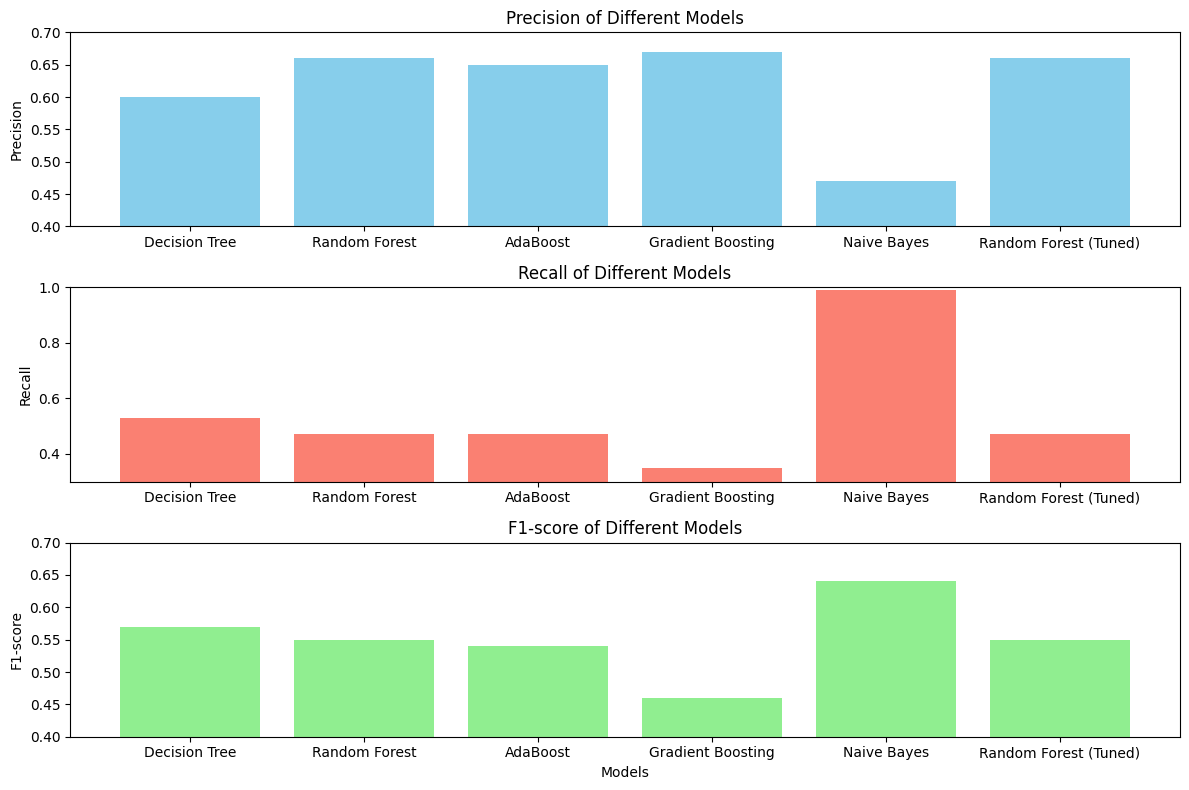

In [129]:
import matplotlib.pyplot as plt

# Models and their evaluation metrics
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes', 'Random Forest (Tuned)']

# Evaluation metrics for each model
precision = [0.60, 0.66, 0.65, 0.67, 0.47, 0.66]  
recall = [0.53, 0.47, 0.47, 0.35, 0.99, 0.47]  
f1_score = [0.57, 0.55, 0.54, 0.46, 0.64, 0.55] 

# Plotting
plt.figure(figsize=(12, 8))

# Precision
plt.subplot(3, 1, 1)
plt.bar(models, precision, color='skyblue')
plt.title('Precision of Different Models')
plt.ylabel('Precision')
plt.ylim(0.4, 0.7)

# Recall
plt.subplot(3, 1, 2)
plt.bar(models, recall, color='salmon')
plt.title('Recall of Different Models')
plt.ylabel('Recall')
plt.ylim(0.3, 1.0)

# F1-score
plt.subplot(3, 1, 3)
plt.bar(models, f1_score, color='lightgreen')
plt.title('F1-score of Different Models')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.ylim(0.4, 0.7)

plt.tight_layout()
plt.show()
